1. Importing panda, numpy,matplotlib seaborn library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the dataset into a pandas DataFrame.

In [3]:
df = pd.read_csv("Dataset_creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


3. Check for any missing values and handle them accordingly.

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**As observed, the dataset contains no missing (null) values across all columns, so no imputation is required.**

4.As observed, the dataset contains no missing (null) values across all columns, so no imputation is required.

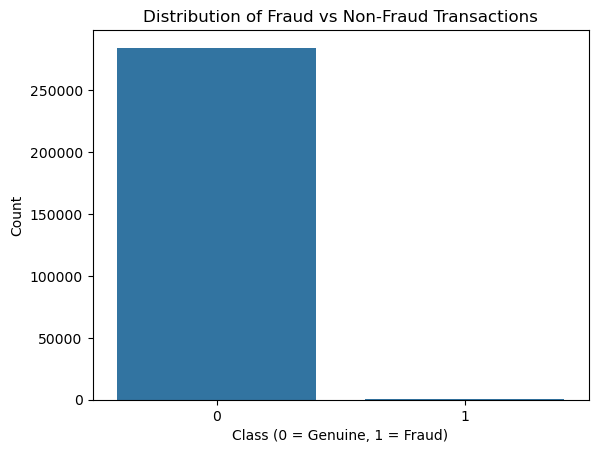

In [5]:
# Count plot for Class column
sns.countplot(x='Class', data=df)

plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0 = Genuine, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

**Observation from bar chart** 

The dataset is highly imbalanced, with very few fraud cases compared to non-fraud cases.

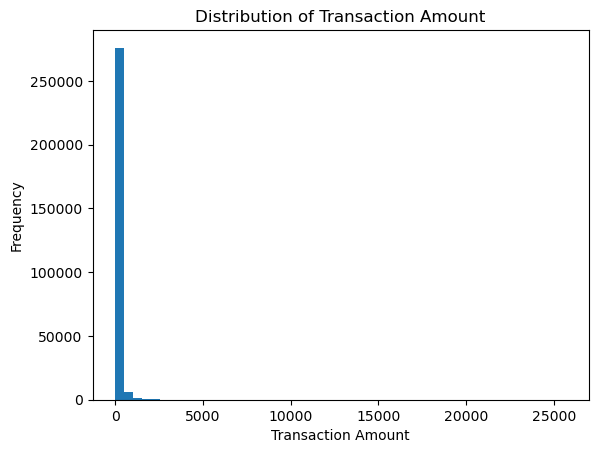

In [6]:
plt.hist(df['Amount'], bins=50)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

**Observations from histogram plot**

The histogram shows a right-skewed distribution, with most transaction amounts being low and a few very high outliers.

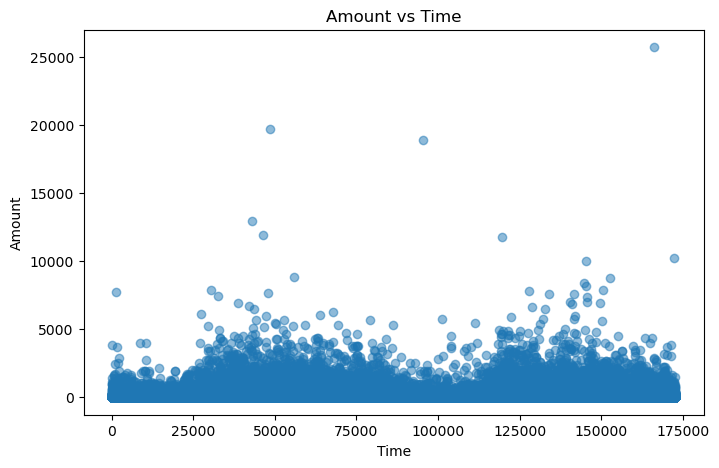

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Time'], df['Amount'], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Amount vs Time')
plt.show()

**Observation from scatter plot**

Most transactions have small amounts and are spread across all time periods. There is no clear pattern between time and transaction amount. A few transactions have very high amounts, which appear as outliers and may indicate suspicious activity.

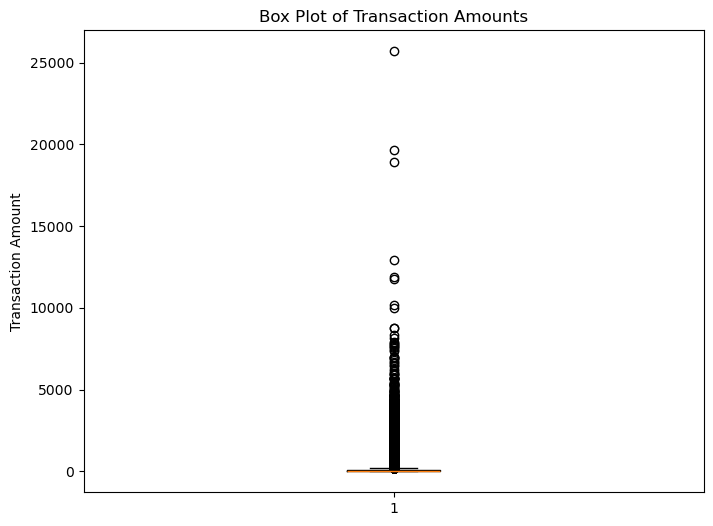

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Amount'], vert=True)
plt.title('Box Plot of Transaction Amounts')
plt.ylabel('Transaction Amount')
plt.show()

**Observation of box plot**

The transaction amounts are highly right-skewed, with most values concentrated at low amounts and several high-value outliers indicating rare but significant transactions.

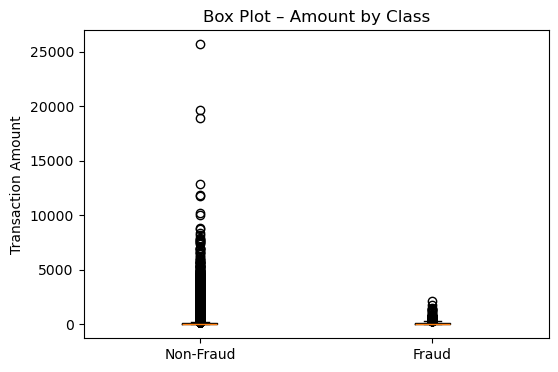

In [9]:
# Box plot of Amount by Class
plt.figure(figsize=(6, 4))
plt.boxplot(
    [df[df['Class'] == 0]['Amount'],
     df[df['Class'] == 1]['Amount']],
    tick_labels=['Non-Fraud', 'Fraud']
)

plt.title('Box Plot – Amount by Class')
plt.ylabel('Transaction Amount')
plt.show()

**Observation of box plot for amount by class**

The box plot shows that fraud transactions usually involve smaller amounts, whereas non-fraud transactions vary widely and include high-value outliers.

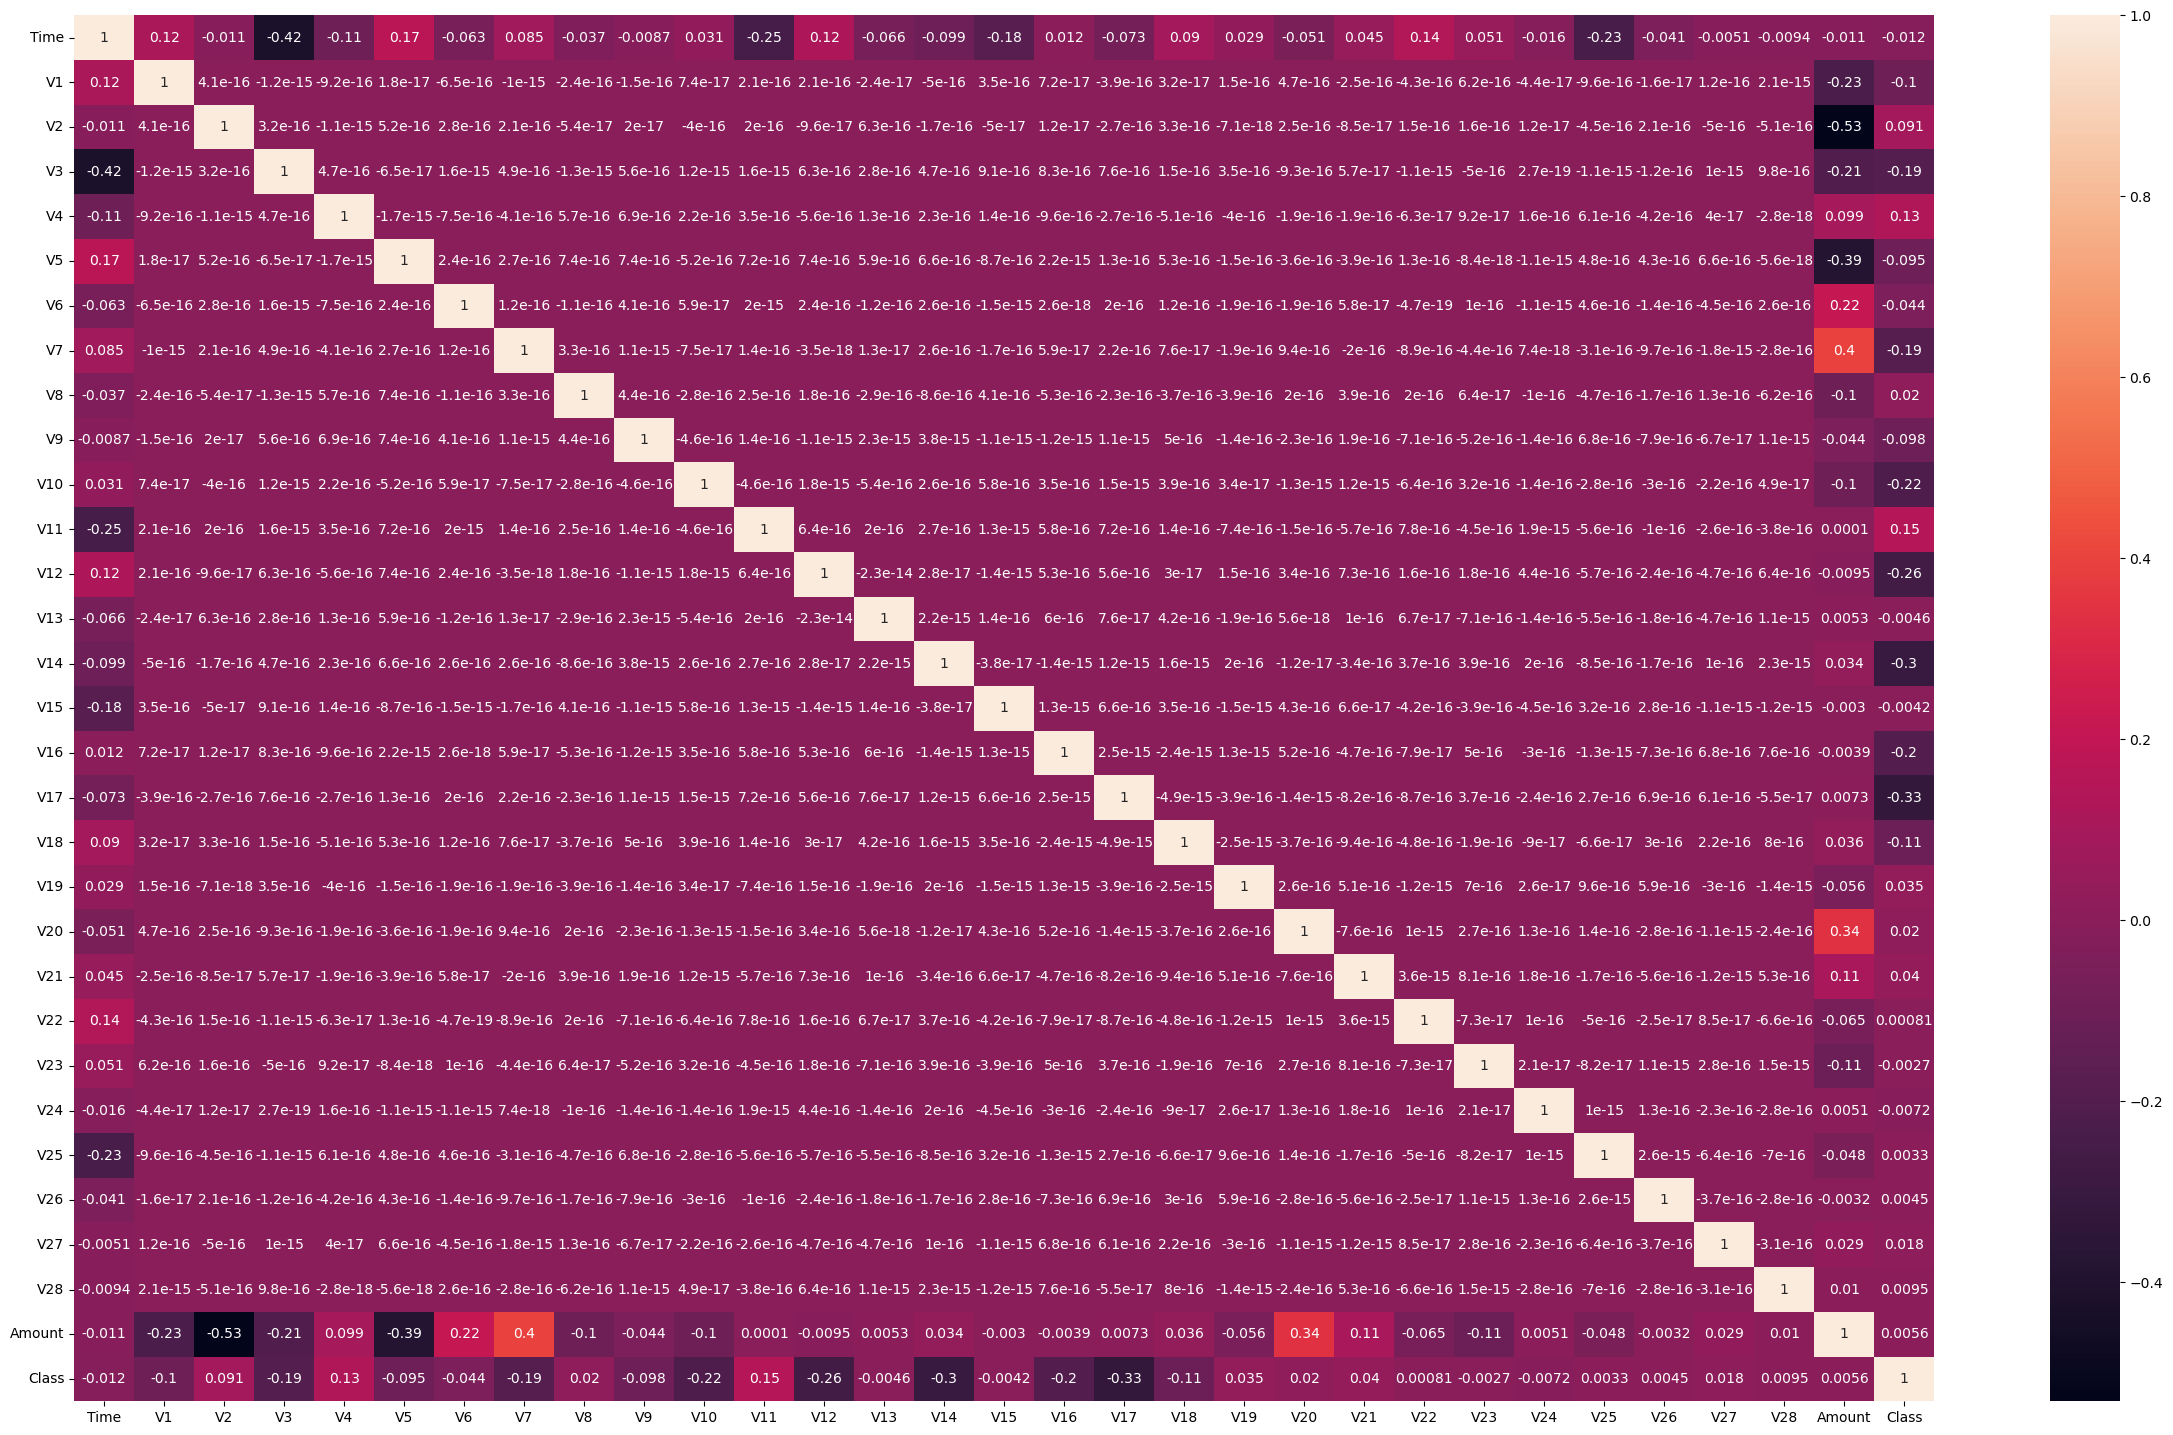

In [10]:
corr = df.corr()

plt.figure(figsize=(30,18))
sns.heatmap(corr, annot=True)
plt.show()

**Observation from Heatmap chart**

- A few PCA features (such as V4, V10, V11, V12, V14, V17) show noticeable positive or negative correlation with the Class.
- This indicates that these features are important for distinguishing fraud and non-fraud transactions.
- The Amount and Time features show weak correlation with the target, meaning they alone are not strong indicators of fraud.

**Balance the dataset if necessary by undersampling the majority class or oversampling the minority class.**

- As per the above chart, we can see approx. 99% non-fraud and 1% fraud
- We don’t want to delete any data
- This is a fraud detection problem (minority class is important)
- We are going to use SMOTE technique for oversampling

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [13]:
print(y_train.value_counts())


Class
0    227451
1       394
Name: count, dtype: int64


In [31]:
#Scaling:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    sampling_strategy=0.1,  # fraud = 10% of non-fraud
    random_state=42,
    k_neighbors=5
)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [33]:
print(y_train_smote.value_counts())


Class
0    227451
1     22745
Name: count, dtype: int64


**We made the approx. 91% Non-Fraud : 9% Fraud ratio**

As this is credit card fraud detection : 
we are not going to make 50-50 ratio data , as it may cause overfitting data,

Model may perform badly on real-world data


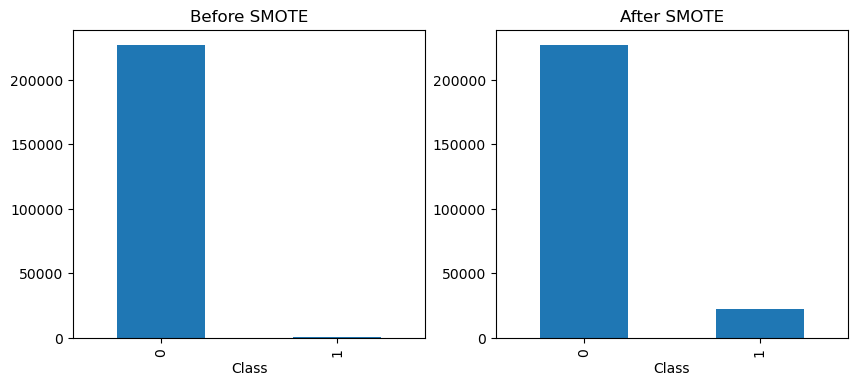

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

y_train.value_counts().plot(kind='bar', ax=ax[0], title='Before SMOTE')
y_train_smote.value_counts().plot(kind='bar', ax=ax[1], title='After SMOTE')

plt.show()

**Build a model that helps detect Credit Card Fraud using logistic regression**

Identify relevant features for the model and drop irrelevant features.

In [35]:
X = df.drop('Class', axis=1)
y = df['Class']

**Engineer new time-based features**

Hour → Fraud patterns by time of day

Day → Long-term transaction behavior

Is_Night → Fraud often occurs at night

In [36]:
X['Hour'] = (X['Time'] // 3600) % 24
X['Day'] = (X['Time'] // (3600 * 24))
X['Is_Night'] = X['Hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)

In [37]:
X = X.drop('Time', axis=1)

Normalize numerical features

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_final = pd.DataFrame(X_scaled, columns=X.columns)
# 6. Show final features
print(X_final.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour',
       'Day', 'Is_Night'],
      dtype='object')


Relevant features were chosen based on an understanding of the dataset. The PCA features (V1–V28) and the transaction amount were kept because they help the model identify fraud patterns. The Time column was used to create new features such as transaction hour, day, and a night indicator to capture when fraud is more likely to occur. After creating these features, the original Time column was removed. Finally, all numerical features were normalized using StandardScaler so that they are on the same scale before training the model.

**Logistic Regression is selected as the classification algorithm because:**

It works well for binary classification problems (Fraud / Non-Fraud)

It is simple, fast, and interpretable

It performs well on linearly separable and high-dimensional data

It is commonly used as a baseline model in fraud detection

In [40]:
#Import necessary libraries

from sklearn.linear_model import LogisticRegression


Logistic Regression is a classification algorithm that:

Predicts the probability of a transaction being fraudulent

Uses the sigmoid function to convert outputs into values between 0 and 1

Assigns:

0 → Non-Fraud

1 → Fraud

If the predicted probability is greater than a chosen threshold (usually 0.5), the transaction is classified as fraud.

**Model Training**

Prepare the training data

In [55]:
#2.Initialize the Model:
model = LogisticRegression(
    solver='liblinear',
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)

In [52]:
#3 Fit the Model: 
model.fit(X_train_smote, y_train_smote)


LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42,
                   solver='liblinear')

**Model Tuning**

1. Import Necessary Libraries:
Import GridSearchCV or RandomizedSearchCV from sklearn.model_selection.


In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

2. Define Hyperparameter Grid:
Create a dictionary defining the hyperparameters and their respective ranges to be tested.

C → controls regularization strength

penalty → type of regularization

solver → optimization algorithm


In [53]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [57]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)


In [58]:
whos

Variable               Type                  Data/Info
------------------------------------------------------
GridSearchCV           ABCMeta               <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
LogisticRegression     type                  <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomizedSearchCV     ABCMeta               <class 'sklearn.model_sel<...>arch.RandomizedSearchCV'>
SMOTE                  ABCMeta               <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
StandardScaler         type                  <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                      DataFrame                            V1        <...>284807 rows x 32 columns]
X_final                DataFrame                           V1        V<...>284807 rows x 32 columns]
X_scaled               ndarray               284807x32: 9113824 elems, type `float64`, 72910592 bytes (69.532958984375 Mb)
X_test                 DataFrame                         Tim

5. Fit the Search Method:
Use the fit method to run the hyperparameter search on the training data.


In [59]:
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=5000, random_state=42,
                                                solver='liblinear'),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42, scoring='recall', verbose=1)

In [61]:
# Extract the best model
best_model = random_search.best_estimator_

# Extract best hyperparameters
best_params = random_search.best_params_

# Best cross-validated score (recall, since you used scoring='recall')
best_score = random_search.best_score_

print("Best Model:\n", best_model)
print("\nBest Hyperparameters:\n", best_params)
print("\nBest CV Recall Score:\n", best_score)

Best Model:
 LogisticRegression(C=0.1, class_weight='balanced', max_iter=5000, penalty='l1',
                   random_state=42, solver='liblinear')

Best Hyperparameters:
 {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}

Best CV Recall Score:
 0.9162425784563188
